# **Import And Seeding**

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import copy
import cv2

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
#from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import RandomFlip, RandomRotation

from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
def seed_everything(seed):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(50)

In [3]:
tf. __version__

'2.18.0'

# **Data Splitting**

In [72]:
'''dataset_dir = "C:\\Dataset\\"
train_dir =   "C:\\Dataset\\Train\\"
test_dir =    "C:\\Dataset\\Test\\"
val_dir =     "C:\\Dataset\\Validation\\"'''

'dataset_dir = "C:\\Dataset\\"\ntrain_dir =   "C:\\Dataset\\Train\\"\ntest_dir =    "C:\\Dataset\\Test\\"\nval_dir =     "C:\\Dataset\\Validation\\"'

In [73]:
'''folder_names = [
    "Corn___Common_Rust", "Corn___Gray_Leaf_Spot", "Corn___Healthy", "Corn___Northern_Leaf_Blight",
    "Potato___Early_Blight", "Potato___Healthy", "Potato___Late_Blight",
    "Rice___Brown_Spot", "Rice___Healthy", "Rice___Leaf_Blast", "Rice___Neck_Blast",
    "Wheat___Brown_Rust", "Wheat___Healthy", "Wheat___Yellow_Rust"
]'''

'folder_names = [\n    "Corn___Common_Rust", "Corn___Gray_Leaf_Spot", "Corn___Healthy", "Corn___Northern_Leaf_Blight",\n    "Potato___Early_Blight", "Potato___Healthy", "Potato___Late_Blight",\n    "Rice___Brown_Spot", "Rice___Healthy", "Rice___Leaf_Blast", "Rice___Neck_Blast",\n    "Wheat___Brown_Rust", "Wheat___Healthy", "Wheat___Yellow_Rust"\n]'

In [74]:
'''for i, folder_name in enumerate(folder_names):
    old_folder_path = os.path.join(dataset_dir, folder_name)
    new_folder_name = str(i)
    new_folder_path = os.path.join(dataset_dir, new_folder_name)
    
    os.rename(old_folder_path, new_folder_path)
    print(f"Renamed '{folder_name}' to '{new_folder_name}'")

print("Folder renaming completed.")'''

'for i, folder_name in enumerate(folder_names):\n    old_folder_path = os.path.join(dataset_dir, folder_name)\n    new_folder_name = str(i)\n    new_folder_path = os.path.join(dataset_dir, new_folder_name)\n    \n    os.rename(old_folder_path, new_folder_path)\n    print(f"Renamed \'{folder_name}\' to \'{new_folder_name}\'")\n\nprint("Folder renaming completed.")'

In [75]:
'''os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)'''

'os.makedirs(train_dir, exist_ok=True)\nos.makedirs(test_dir, exist_ok=True)\nos.makedirs(val_dir, exist_ok=True)'

In [76]:
'''folder_names = [
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13"
]'''

'folder_names = [\n    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13"\n]'

In [77]:
'''train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1'''

'train_ratio = 0.7\ntest_ratio = 0.2\nval_ratio = 0.1'

In [78]:
'''import shutil

for folder_name in folder_names:
    folder_path = os.path.join(dataset_dir, folder_name)
    images = os.listdir(folder_path)
    random.shuffle(images) 

    total_images = len(images)
    train_count = int(total_images * train_ratio)
    test_count = int(total_images * test_ratio)
    val_count = total_images - train_count - test_count

    train_images = images[:train_count]
    test_images = images[train_count:train_count + test_count]
    val_images = images[train_count + test_count:]


    for image_name in train_images:
        src_path = os.path.join(folder_path, image_name)
        dst_path = os.path.join(train_dir, folder_name, image_name)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image_name in test_images:
        src_path = os.path.join(folder_path, image_name)
        dst_path = os.path.join(test_dir, folder_name, image_name)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image_name in val_images:
        src_path = os.path.join(folder_path, image_name)
        dst_path = os.path.join(val_dir, folder_name, image_name)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

print("Dataset splitting completed.")'''

'import shutil\n\nfor folder_name in folder_names:\n    folder_path = os.path.join(dataset_dir, folder_name)\n    images = os.listdir(folder_path)\n    random.shuffle(images) \n\n    total_images = len(images)\n    train_count = int(total_images * train_ratio)\n    test_count = int(total_images * test_ratio)\n    val_count = total_images - train_count - test_count\n\n    train_images = images[:train_count]\n    test_images = images[train_count:train_count + test_count]\n    val_images = images[train_count + test_count:]\n\n\n    for image_name in train_images:\n        src_path = os.path.join(folder_path, image_name)\n        dst_path = os.path.join(train_dir, folder_name, image_name)\n        os.makedirs(os.path.dirname(dst_path), exist_ok=True)\n        shutil.copy(src_path, dst_path)\n\n    for image_name in test_images:\n        src_path = os.path.join(folder_path, image_name)\n        dst_path = os.path.join(test_dir, folder_name, image_name)\n        os.makedirs(os.path.dirname(d

# **Exploratory data analysis (EDA)**

In [4]:
train_dir = "C:\\Dataset\\Train\\"
test_dir = "C:\\Dataset\\Test\\"
validation_dir ="C:\\Dataset\\Validation\\"

In [5]:
train_data = []

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        train_data.append((file_path, class_name))

In [6]:
train_df = pd.DataFrame(train_data, columns=['File_Path', 'Class_Name'])
train_df

File_Path Class_Name
0        C:\Dataset\Train\0\image (1).JPG          0
1      C:\Dataset\Train\0\image (100).JPG          0
2     C:\Dataset\Train\0\image (1002).JPG          0
3     C:\Dataset\Train\0\image (1004).JPG          0
4     C:\Dataset\Train\0\image (1007).JPG          0
...                                   ...        ...
9107      C:\Dataset\Train\9\rb_wb_94.jpg          9
9108      C:\Dataset\Train\9\rb_wb_95.jpg          9
9109      C:\Dataset\Train\9\rb_wb_96.jpg          9
9110      C:\Dataset\Train\9\rb_wb_97.jpg          9
9111      C:\Dataset\Train\9\rb_wb_99.jpg          9

[9112 rows x 2 columns]

In [7]:
train_df['Class_Name'].value_counts().sort_index()

Class_Name
0      834
1      359
10     700
11     631
12     781
13     646
2      813
3      689
4      700
5      106
6      700
7      429
8     1041
9      683
Name: count, dtype: int64

In [8]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

In [9]:
train_df['File_Path'][0]

'C:\\Dataset\\Train\\0\\image (1).JPG'

In [10]:
category = ['Corn Common Rust','Corn Gray Leaf','Corn Healthy','Corn Northern Leaf Blight','Potato Early Blight','Potato Healthy','Potato Late Blight','Rice Brown Spot','Rice Healthy','Rice Leaf Blast','Rice Neck Blast','Wheat Brown Rust','Wheat Healthy','Wheat Yellow Rust']
count = [1192, 513, 1162, 985,1000, 152, 1000, 613, 1488, 977, 1000, 902, 1116, 924]

In [11]:
crop_df = pd.DataFrame({'Category': ['Corn Common Rust','Corn Gray Leaf','Corn Healthy','Corn Northern Leaf Blight','Potato Early Blight','Potato Healthy','Potato Late Blight','Rice Brown Spot','Rice Healthy','Rice Leaf Blast','Rice Neck Blast','Wheat Brown Rust','Wheat Healthy','Wheat Yellow Rust'],
                   'total_image': [1192, 513, 1162, 985,1000, 152, 1000, 613, 1488, 977, 1000, 902, 1116, 924]})
crop_df.set_index('Category', inplace=True)
crop_df

total_image
Category                              
Corn Common Rust                  1192
Corn Gray Leaf                     513
Corn Healthy                      1162
Corn Northern Leaf Blight          985
Potato Early Blight               1000
Potato Healthy                     152
Potato Late Blight                1000
Rice Brown Spot                    613
Rice Healthy                      1488
Rice Leaf Blast                    977
Rice Neck Blast                   1000
Wheat Brown Rust                   902
Wheat Healthy                     1116
Wheat Yellow Rust                  924

<Axes: title={'center': 'Image Distribution for Class Labels'}, ylabel='total_image'>

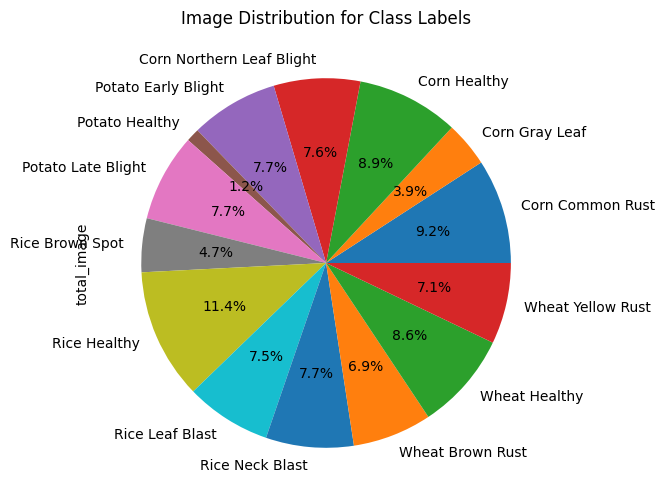

In [12]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
crop_df.total_image.plot(kind='pie', ax=ax, startangle=0, fontsize=10, autopct='%1.1f%%', title='Image Distribution for Class Labels')

In [13]:
plant_df = pd.DataFrame({'Plants': ['Corn','Potato','Rice','Wheat'],
                   'total_image': [3852, 2152, 4078, 2942]})
plant_df.set_index('Plants', inplace=True)
plant_df

total_image
Plants             
Corn           3852
Potato         2152
Rice           4078
Wheat          2942

<Axes: title={'center': '% per plants'}, ylabel='total_image'>

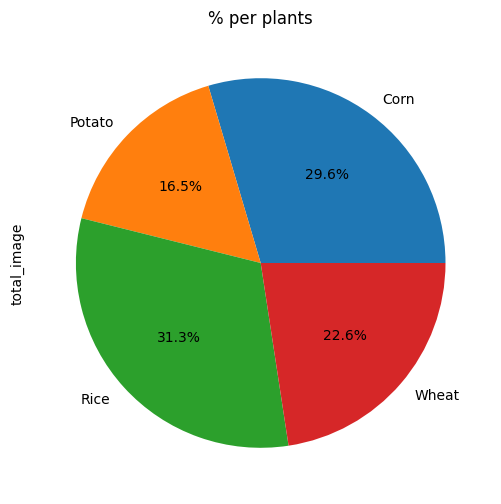

In [14]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plant_df.total_image.plot(kind='pie', ax=ax, startangle=0, fontsize=10, autopct='%1.1f%%', title='% per plants')

In [15]:
img_width, img_height = 299, 299

# **CORN**

In [16]:
EDA_class_names = ['Corn Common Rust', 'Corn Gray Leaf Spot', 'Corn Healthy', 'Corn Northern Leaf Blight']

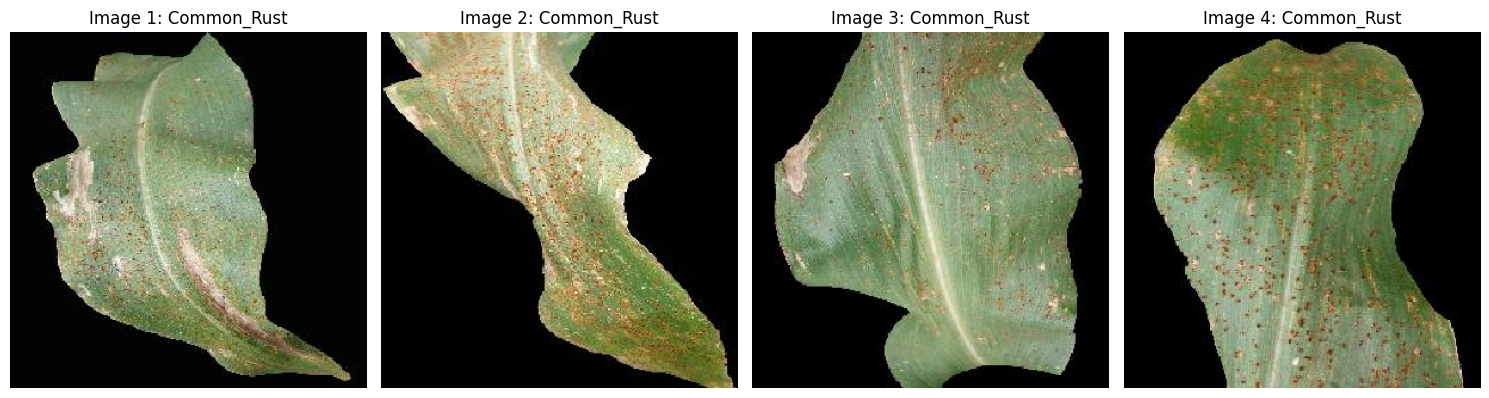

In [17]:
desired_class = "0"
name = "Common_Rust"

desired_class_df = train_df[train_df['Class_Name'] == desired_class]

num_images_to_plot = 4
    
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i, (index, row) in enumerate(desired_class_df.head(num_images_to_plot).iterrows()):
    image_path = row['File_Path']
    image = load_img(image_path, target_size=(img_width, img_height))
    
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}: {name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

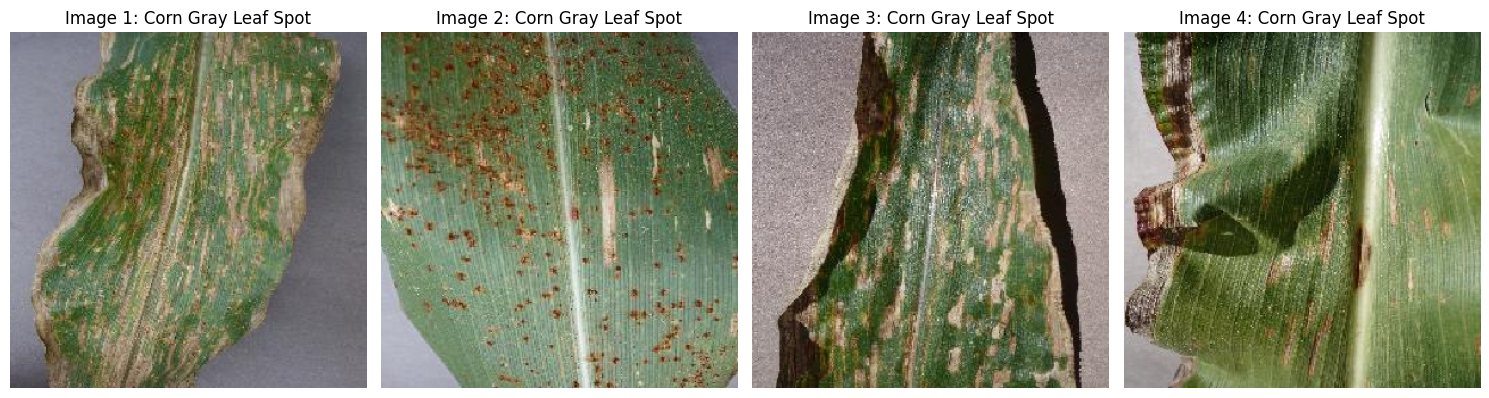

In [18]:
desired_class = "1"
name = "Corn Gray Leaf Spot"

desired_class_df = train_df[train_df['Class_Name'] == desired_class]

num_images_to_plot = 4
    
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i, (index, row) in enumerate(desired_class_df.head(num_images_to_plot).iterrows()):
    image_path = row['File_Path']
    image = load_img(image_path, target_size=(img_width, img_height))
    
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}: {name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

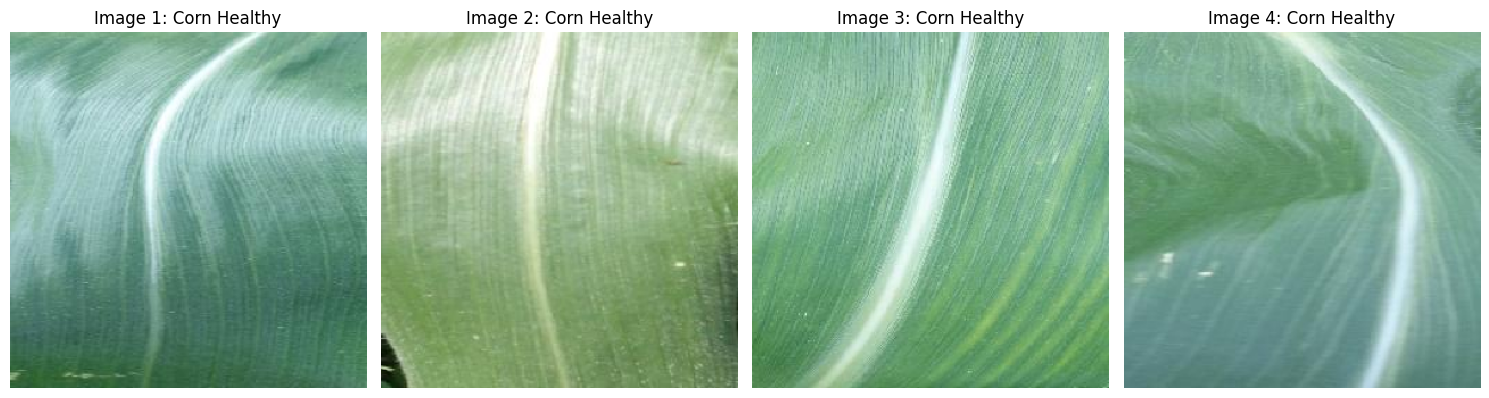

In [19]:
desired_class = "2"
name = "Corn Healthy"

desired_class_df = train_df[train_df['Class_Name'] == desired_class]

num_images_to_plot = 4
    
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i, (index, row) in enumerate(desired_class_df.head(num_images_to_plot).iterrows()):
    image_path = row['File_Path']
    image = load_img(image_path, target_size=(img_width, img_height))
    
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}: {name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

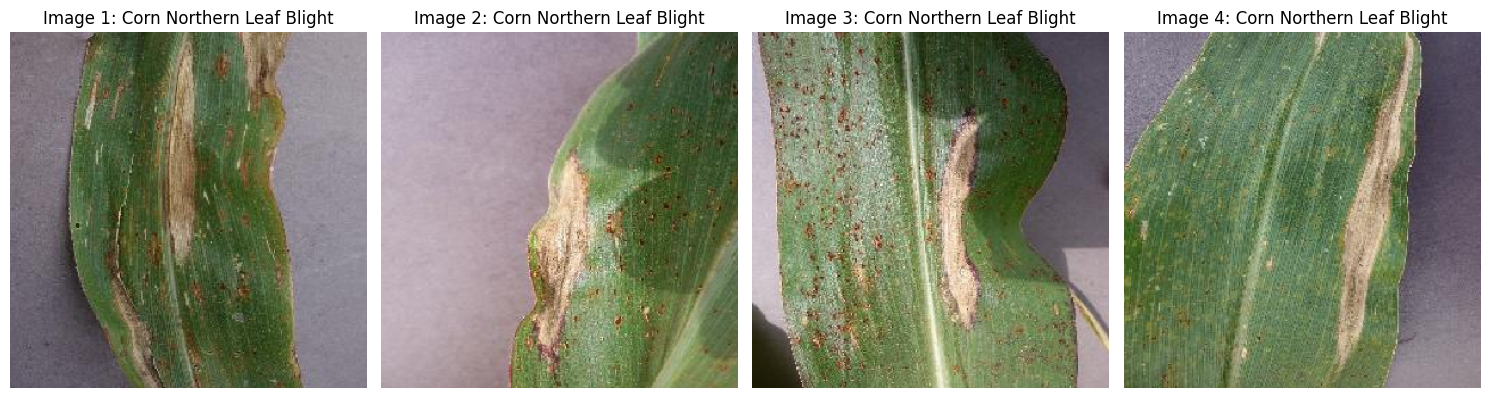

In [20]:
desired_class = "3"
name = "Corn Northern Leaf Blight"

desired_class_df = train_df[train_df['Class_Name'] == desired_class]

num_images_to_plot = 4
    
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i, (index, row) in enumerate(desired_class_df.head(num_images_to_plot).iterrows()):
    image_path = row['File_Path']
    image = load_img(image_path, target_size=(img_width, img_height))
    
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}: {name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# **Model**

In [21]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

batch_size = 32

# **Xception-Model**

In [97]:
model1 = Xception(include_top=False,input_shape=(299, 299, 3), weights='imagenet')

In [98]:
input_shape= (299, 299)

In [99]:
datagen_train = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False)


datagen_test = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)


generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

generator_val = datagen_val.flow_from_directory(directory=validation_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)


Found 9112 images belonging to 14 classes.
Found 2600 images belonging to 14 classes.
Found 1312 images belonging to 14 classes.


In [100]:
math.ceil(generator_train.samples)

9112

In [101]:
next(generator_train)[1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0

In [102]:
conv_model = Model(inputs=model1.input, outputs=model1.output)

In [103]:
new_model = Sequential()
new_model.add(conv_model)
new_model.add(Flatten())
new_model.add(Dropout(0.5))
new_model.add(Dense(512, activation='relu'))
new_model.add(Dense(14, activation='softmax'))

In [104]:
new_model.compile(optimizer= opt, loss=loss, metrics=metrics)

In [105]:
num_iters = 30000
num_batches_train = generator_train.n // batch_size

# epochs = int(num_iters / num_batches_train)
epochs = 11
print("Epoch: ",epochs)
desired_train_accuracy = 0.99

steps_per_epoch = generator_train.n // batch_size
steps_val = generator_val.n // batch_size
print("Steps_per_epoch: ",steps_per_epoch)
print("Steps_val: ",steps_val)

Epoch:  11
Steps_per_epoch:  284
Steps_val:  41


In [106]:
Checkpoint = ModelCheckpoint("Xception.h5", monitor="val_accuracy", save_best_only=True, mode="max")
EarlyStop = EarlyStopping(monitor="accuracy", baseline=desired_train_accuracy, patience=10, restore_best_weights=True, mode="auto")

history = new_model.fit(generator_train,
                                  epochs=epochs,
                                  callbacks=[Checkpoint, EarlyStop],
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=generator_val,
                                  validation_steps=steps_val)


C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/11
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.7690 - loss: 0.8582   

284/284 ━━━━━━━━━━━━━━━━━━━━ 4198s 15s/step - accuracy: 0.7693 - loss: 0.8567 - val_accuracy: 0.9398 - val_loss: 0.1713
Epoch 2/11
  1/284 ━━━━━━━━━━━━━━━━━━━━ 2:22:32 30s/step - accuracy: 0.7812 - loss: 0.7949

C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


284/284 ━━━━━━━━━━━━━━━━━━━━ 153s 435ms/step - accuracy: 0.7812 - loss: 0.7949 - val_accuracy: 0.9398 - val_loss: 0.1684
Epoch 3/11
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.9441 - loss: 0.1619   

284/284 ━━━━━━━━━━━━━━━━━━━━ 4112s 14s/step - accuracy: 0.9441 - loss: 0.1618 - val_accuracy: 0.9512 - val_loss: 0.1214
Epoch 4/11
284/284 ━━━━━━━━━━━━━━━━━━━━ 170s 501ms/step - accuracy: 0.8438 - loss: 0.3138 - val_accuracy: 0.9497 - val_loss: 0.1240
Epoch 5/11
284/284 ━━━━━━━━━━━━━━━━━━━━ 4321s 15s/step - accuracy: 0.9665 - loss: 0.0963 - val_accuracy: 0.9497 - val_loss: 0.1509
Epoch 6/11
284/284 ━━━━━━━━━━━━━━━━━━━━ 156s 478ms/step - accuracy: 0.9688 - loss: 0.0476 - val_accuracy: 0.9505 - val_loss: 0.1510
Epoch 7/11
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 28s/step - accuracy: 0.9683 - loss: 0.1046     

284/284 ━━━━━━━━━━━━━━━━━━━━ 8025s 28s/step - accuracy: 0.9683 - loss: 0.1046 - val_accuracy: 0.9634 - val_loss: 0.0993
Epoch 8/11
  1/284 ━━━━━━━━━━━━━━━━━━━━ 1:36:32 20s/step - accuracy: 0.9688 - loss: 0.1273

284/284 ━━━━━━━━━━━━━━━━━━━━ 177s 554ms/step - accuracy: 0.9688 - loss: 0.1273 - val_accuracy: 0.9649 - val_loss: 0.0999
Epoch 9/11
284/284 ━━━━━━━━━━━━━━━━━━━━ 4672s 16s/step - accuracy: 0.9730 - loss: 0.0817 - val_accuracy: 0.9611 - val_loss: 0.1223
Epoch 10/11
284/284 ━━━━━━━━━━━━━━━━━━━━ 195s 590ms/step - accuracy: 1.0000 - loss: 0.0253 - val_accuracy: 0.9604 - val_loss: 0.1223
Epoch 11/11
284/284 ━━━━━━━━━━━━━━━━━━━━ 4077s 14s/step - accuracy: 0.9745 - loss: 0.0762 - val_accuracy: 0.9619 - val_loss: 0.1131


In [107]:
model_path = "Xception.h5"

In [108]:
new_model=tf.keras.models.load_model(model_path)

In [109]:
Y_pred = new_model.predict(generator_test)
y_pred = np.argmax(Y_pred, axis=1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step


In [110]:
class_labels = list(generator_test.class_indices.keys())

In [111]:
print(classification_report(generator_test.classes, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.90      0.86      0.88       102
          10       1.00      1.00      1.00       200
          11       0.99      0.99      0.99       180
          12       0.99      1.00      1.00       223
          13       0.99      0.98      0.99       184
           2       1.00      1.00      1.00       232
           3       0.93      0.94      0.94       197
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00       200
           7       0.82      0.84      0.83       122
           8       0.92      0.91      0.92       297
           9       0.85      0.86      0.85       195

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



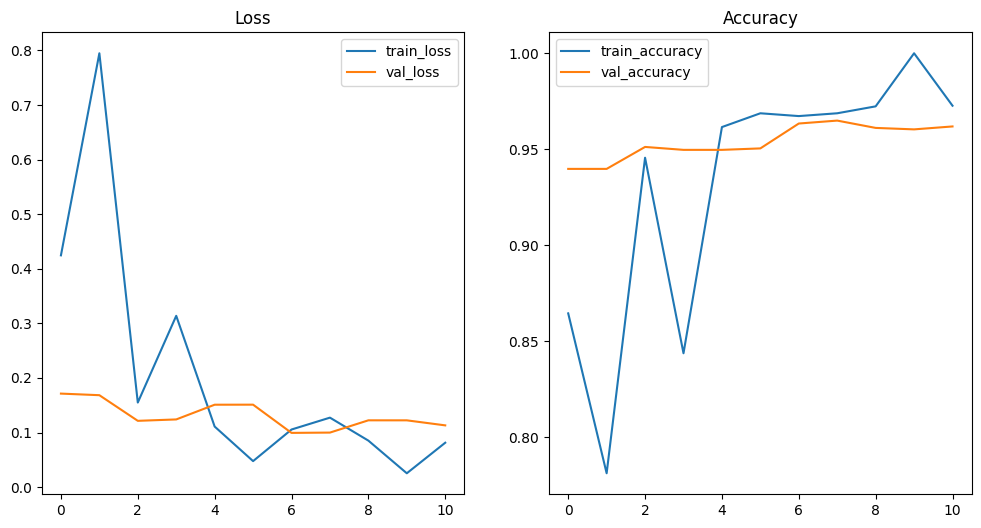

In [112]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()

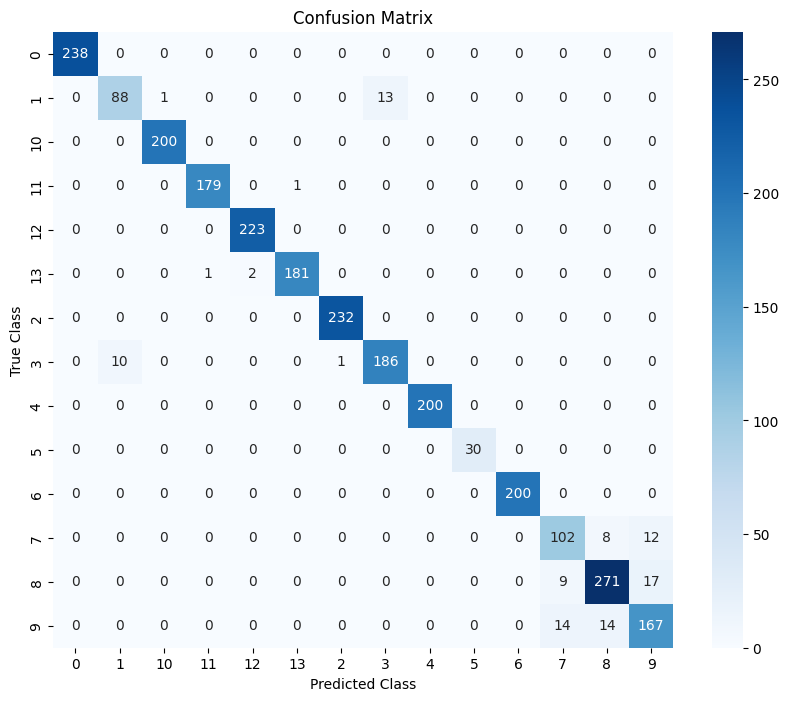

In [113]:
cm = confusion_matrix(generator_test.classes, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [114]:
image_path_show_X=[]
image_show_X=[]

class_image_path_show_X=[]
class_image_show_X=[]

# **Misclassify Images**

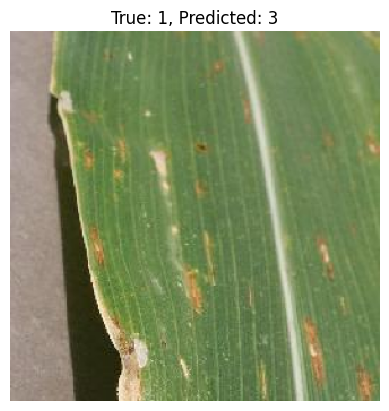

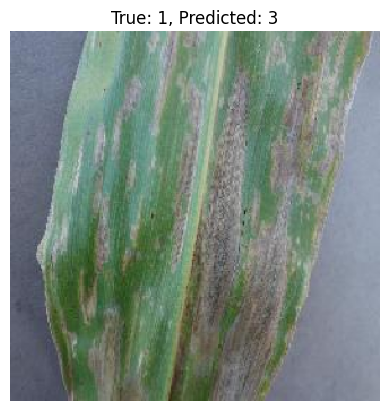

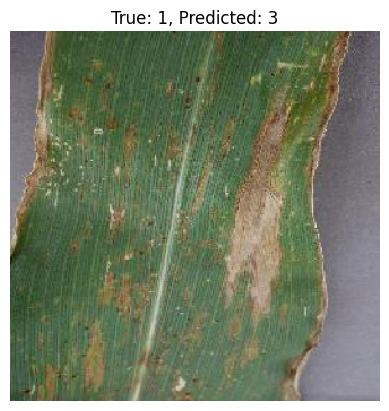

In [115]:
img_width, img_height= 299, 299
misclassified_images_X = []
for i in range(len(y_pred)):
    if y_pred[i] != generator_test.classes[i]:
        img_path = generator_test.filepaths[i]
        true_label = generator_test.classes[i]
        predicted_label = y_pred[i]
        misclassified_images_X.append((img_path, true_label, predicted_label))


num_display = 3
for img_path, true_label, predicted_label in misclassified_images_X[:num_display]:
    img = load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_label]}, Predicted: {class_labels[predicted_label]}")
    plt.axis('off')
    plt.show()
    
    image_path_show_X.append(img_path)
    image_show_X.append(img)

# **Correctly Classify Images**

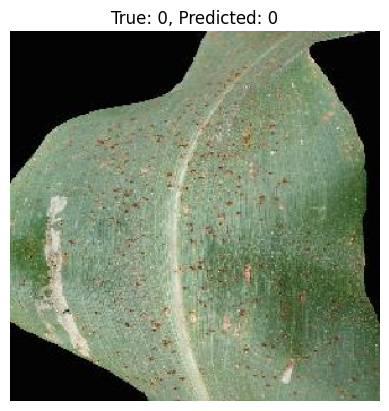

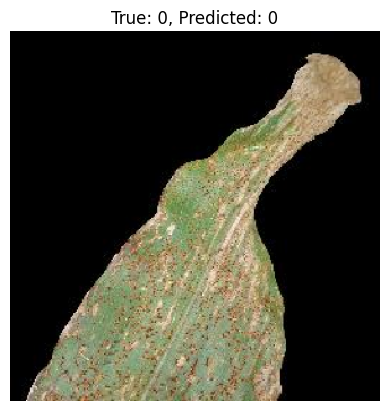

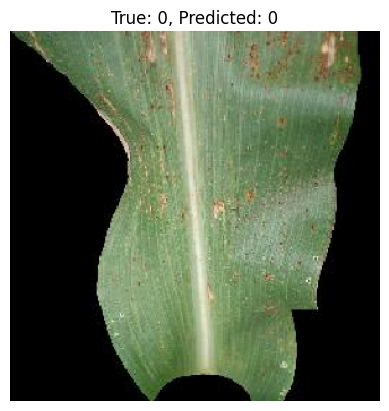

In [116]:
img_width, img_height= 299, 299
classified_images_X = []
for i in range(len(y_pred)):
    if y_pred[i] == generator_test.classes[i]:
        img_path = generator_test.filepaths[i]
        true_label = generator_test.classes[i]
        predicted_label = y_pred[i]
        classified_images_X.append((img_path, true_label, predicted_label))


num_display = 3
for img_path, true_label, predicted_label in classified_images_X[:num_display]:
    img = load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_label]}, Predicted: {class_labels[predicted_label]}")
    plt.axis('off')
    plt.show()
    
    class_image_path_show_X.append(img_path)
    class_image_show_X.append(img)

In [117]:
image_path_show_X
image_show_X

[<PIL.Image.Image image mode=RGB size=299x299>,
 <PIL.Image.Image image mode=RGB size=299x299>,
 <PIL.Image.Image image mode=RGB size=299x299>]

# **InceptionV3**

In [22]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [23]:
model2 = InceptionV3(include_top=False,input_shape=(228, 228, 3), weights='imagenet')

In [24]:
input_shape= (228, 228)

In [25]:
datagen_train1 = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                    dtype=np.float32)


datagen_test1 = ImageDataGenerator(rescale=1./255, dtype=np.float32)
datagen_val1 = ImageDataGenerator(rescale=1./255, dtype=np.float32)


generator_train1 = datagen_train1.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

generator_test1 = datagen_test1.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

generator_val1 = datagen_val1.flow_from_directory(directory=validation_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)


Found 9112 images belonging to 14 classes.
Found 2600 images belonging to 14 classes.
Found 1312 images belonging to 14 classes.


In [26]:
math.ceil(generator_train1.samples)

9112

In [27]:
next(generator_train1)[1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0

In [28]:
conv_model1 = Model(inputs=model2.input, outputs=model2.output)
new_model1 = Sequential()
new_model1.add(conv_model1)
new_model1.add(Flatten())
new_model1.add(Dropout(0.5))
new_model1.add(Dense(512, activation='relu'))
new_model1.add(Dense(14, activation='softmax'))

In [29]:
new_model1.compile(optimizer= opt, loss=loss, metrics=metrics)

In [30]:
num_iters = 30000
num_batches_train = generator_train1.n // batch_size

# epochs = int(num_iters / num_batches_train)
epochs = 20
print("Epoch: ",epochs)
desired_train_accuracy = 0.99

steps_per_epoch = generator_train1.n // batch_size
steps_val = generator_val1.n // batch_size
print("Steps_per_epoch: ",steps_per_epoch)
print("Steps_val: ",steps_val)

Epoch:  20
Steps_per_epoch:  284
Steps_val:  41


In [31]:
import tensorflow as tf
print("Eager Execution Enabled?", tf.executing_eagerly())

Eager Execution Enabled? True


In [32]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

class DesiredAccuracyCallback(Callback):
    def __init__(self, desired_accuracy):
        super(DesiredAccuracyCallback, self).__init__()
        self.desired_accuracy = desired_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= self.desired_accuracy:
            print(f"Desired training accuracy of {self.desired_accuracy*100:.2f}% reached. Stopping training.")
            self.model.stop_training = True

Checkpoint = ModelCheckpoint("inceptionV3.h5", monitor="val_accuracy", save_best_only=True, mode="max")
EarlyStop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, mode="auto")
DesiredAccStop = DesiredAccuracyCallback(desired_train_accuracy)

history1 = new_model1.fit(generator_train1,
                                    epochs=epochs,
                                    callbacks=[Checkpoint, EarlyStop, DesiredAccStop],
                                    steps_per_epoch=steps_per_epoch,
                                    validation_data=generator_val1,
                                    validation_steps=steps_val)

C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6732 - loss: 1.0439   

284/284 ━━━━━━━━━━━━━━━━━━━━ 2048s 7s/step - accuracy: 0.6736 - loss: 1.0423 - val_accuracy: 0.8910 - val_loss: 0.2785
Epoch 2/20
  1/284 ━━━━━━━━━━━━━━━━━━━━ 26:45 6s/step - accuracy: 0.9375 - loss: 0.1891

C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


284/284 ━━━━━━━━━━━━━━━━━━━━ 76s 248ms/step - accuracy: 0.9375 - loss: 0.1891 - val_accuracy: 0.9055 - val_loss: 0.2496
Epoch 3/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.9066 - loss: 0.2532       

284/284 ━━━━━━━━━━━━━━━━━━━━ 4188s 15s/step - accuracy: 0.9066 - loss: 0.2532 - val_accuracy: 0.9284 - val_loss: 0.1957
Epoch 4/20
  1/284 ━━━━━━━━━━━━━━━━━━━━ 14:12 3s/step - accuracy: 0.9375 - loss: 0.3127

284/284 ━━━━━━━━━━━━━━━━━━━━ 51s 168ms/step - accuracy: 0.9375 - loss: 0.3127 - val_accuracy: 0.9291 - val_loss: 0.2007
Epoch 5/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9290 - loss: 0.1949   

284/284 ━━━━━━━━━━━━━━━━━━━━ 2975s 10s/step - accuracy: 0.9290 - loss: 0.1949 - val_accuracy: 0.9360 - val_loss: 0.1962
Epoch 6/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 85s 282ms/step - accuracy: 0.9375 - loss: 0.1466 - val_accuracy: 0.9345 - val_loss: 0.1974
Epoch 7/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 11380s 40s/step - accuracy: 0.9477 - loss: 0.1528 - val_accuracy: 0.9299 - val_loss: 0.1965
Epoch 8/20
Desired training accuracy of 99.00% reached. Stopping training.step - accuracy: 1.0000 - loss: 0.0186
284/284 ━━━━━━━━━━━━━━━━━━━━ 64s 211ms/step - accuracy: 1.0000 - loss: 0.0186 - val_accuracy: 0.9276 - val_loss: 0.2021


In [33]:
new_model1=tf.keras.models.load_model('inceptionV3.h5')

In [34]:
Y_pred1 = new_model1.predict(generator_test1)
y_pred1 = np.argmax(Y_pred1, axis=1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step


In [35]:
class_labels = list(generator_test1.class_indices.keys())

In [36]:
print(classification_report(generator_test1.classes, y_pred1, target_names=class_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.82      0.95      0.88       102
          10       1.00      1.00      1.00       200
          11       0.98      0.99      0.99       180
          12       0.99      1.00      0.99       223
          13       1.00      0.98      0.99       184
           2       1.00      1.00      1.00       232
           3       0.97      0.89      0.93       197
           4       0.92      1.00      0.96       200
           5       0.81      0.97      0.88        30
           6       0.99      0.88      0.93       200
           7       0.79      0.68      0.73       122
           8       0.89      0.91      0.90       297
           9       0.75      0.79      0.77       195

    accuracy                           0.94      2600
   macro avg       0.92      0.93      0.92      2600
weighted avg       0.94      0.94      0.94      2600



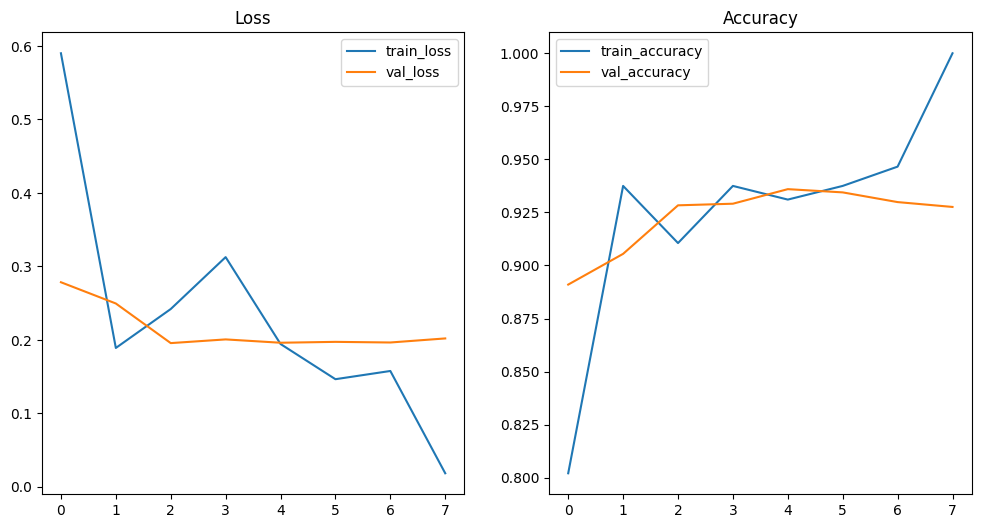

In [37]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history["loss"], label="train_loss")
plt.plot(history1.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history1.history["accuracy"], label="train_accuracy")
plt.plot(history1.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()

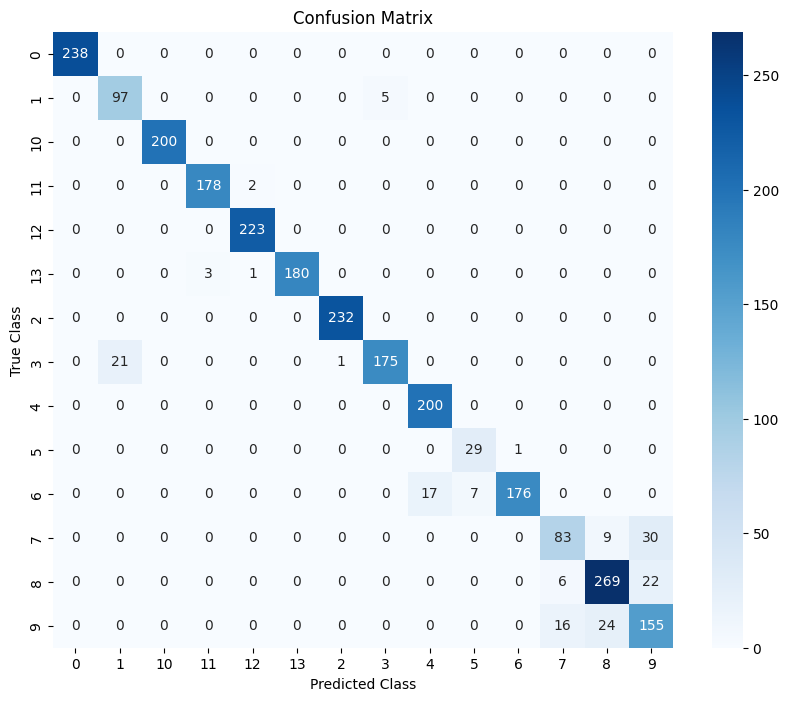

In [38]:
cm1 = confusion_matrix(generator_test1.classes, y_pred1)

plt.figure(figsize=(10, 8))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [39]:
image_path_show_IN=[]
image_show_IN=[]

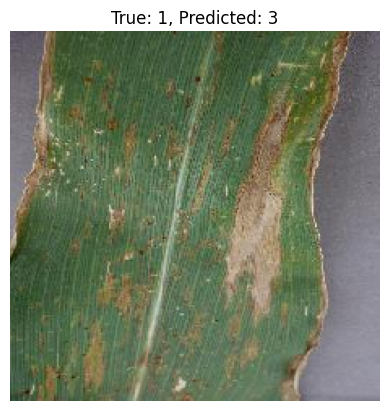

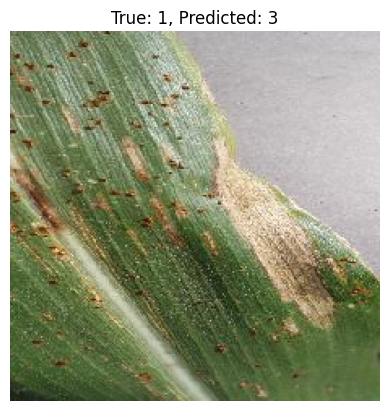

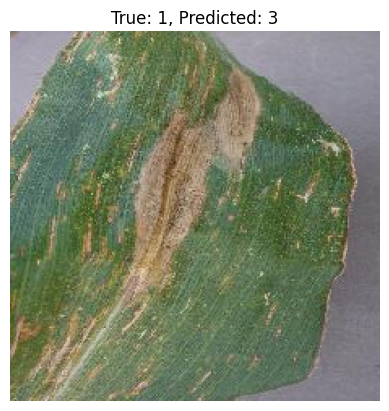

In [40]:
img_width, img_height= 228, 228
misclassified_images_IN = []
for i in range(len(y_pred1)):
    if y_pred1[i] != generator_test1.classes[i]:
        img_path = generator_test1.filepaths[i]
        true_label = generator_test1.classes[i]
        predicted_label = y_pred1[i]
        misclassified_images_IN.append((img_path, true_label, predicted_label))


num_display = 3
for img_path, true_label, predicted_label in misclassified_images_IN[:num_display]:
    img = load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_label]}, Predicted: {class_labels[predicted_label]}")
    plt.axis('off')
    plt.show()
    
    image_path_show_IN.append(img_path)
    image_show_IN.append(img)

# **VGG19**

In [22]:
from tensorflow.keras.applications.vgg19 import VGG19

In [23]:
model3 = VGG19(include_top=False,input_shape=(228, 228, 3), weights='imagenet')

In [24]:
input_shape= (228, 228)

In [25]:
datagen_train2 = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                   dtype=np.float32)


datagen_test2 = ImageDataGenerator(rescale=1./255, dtype=np.float32)
datagen_val2 = ImageDataGenerator(rescale=1./255, dtype=np.float32)


generator_train2 = datagen_train2.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

generator_test2 = datagen_test2.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

generator_val2 = datagen_val2.flow_from_directory(directory=validation_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)


Found 9112 images belonging to 14 classes.
Found 2600 images belonging to 14 classes.
Found 1312 images belonging to 14 classes.


In [26]:
math.ceil(generator_train2.samples)

9112

In [27]:
next(generator_train2)[1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0

In [28]:
conv_model2 = Model(inputs=model3.input, outputs=model3.output)
new_model2 = Sequential()
new_model2.add(conv_model2)
new_model2.add(Flatten())
new_model2.add(Dropout(0.5))
new_model2.add(Dense(512, activation='relu'))
new_model2.add(Dense(14, activation='softmax'))

In [29]:
new_model2.compile(optimizer= opt, loss=loss, metrics=metrics)

In [30]:
num_iters = 30000
num_batches_train = generator_train2.n // batch_size

epochs = 10
print("Epoch: ",epochs)
desired_train_accuracy = 0.99

steps_per_epoch = generator_train2.n // batch_size
steps_val = generator_val2.n // batch_size
print("Steps_per_epoch: ",steps_per_epoch)
print("Steps_val: ",steps_val)

Epoch:  10
Steps_per_epoch:  284
Steps_val:  41


In [31]:
class DesiredAccuracyCallback(Callback):
    def __init__(self, desired_accuracy):
        super(DesiredAccuracyCallback, self).__init__()
        self.desired_accuracy = desired_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= self.desired_accuracy:
            print(f"Desired training accuracy of {self.desired_accuracy*100:.2f}% reached. Stopping training.")
            self.model.stop_training = True


Checkpoint = ModelCheckpoint("VGG19.h5", monitor="val_accuracy", save_best_only=True, mode="max")
DesiredAccStop = DesiredAccuracyCallback(desired_train_accuracy)
EarlyStop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, mode="auto")


history2 = new_model2.fit(generator_train2,
                                    epochs=epochs,
                                    callbacks=[Checkpoint, DesiredAccStop, EarlyStop],
                                    steps_per_epoch=steps_per_epoch,
                                    validation_data=generator_val2,
                                    validation_steps=steps_val)

C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.3805 - loss: 1.7768     

284/284 ━━━━━━━━━━━━━━━━━━━━ 5827s 21s/step - accuracy: 0.3811 - loss: 1.7747 - val_accuracy: 0.7561 - val_loss: 0.6443
Epoch 2/10
  1/284 ━━━━━━━━━━━━━━━━━━━━ 1:11:23 15s/step - accuracy: 0.5625 - loss: 1.0243

C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


284/284 ━━━━━━━━━━━━━━━━━━━━ 201s 657ms/step - accuracy: 0.5625 - loss: 1.0243 - val_accuracy: 0.7607 - val_loss: 0.6243
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.7631 - loss: 0.5676     

284/284 ━━━━━━━━━━━━━━━━━━━━ 6164s 22s/step - accuracy: 0.7632 - loss: 0.5674 - val_accuracy: 0.7980 - val_loss: 0.5002
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 198s 642ms/step - accuracy: 0.8438 - loss: 0.5892 - val_accuracy: 0.7881 - val_loss: 0.5156
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.8073 - loss: 0.4481     

284/284 ━━━━━━━━━━━━━━━━━━━━ 6393s 23s/step - accuracy: 0.8074 - loss: 0.4481 - val_accuracy: 0.8491 - val_loss: 0.3803
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 245s 800ms/step - accuracy: 0.8750 - loss: 0.3522 - val_accuracy: 0.8338 - val_loss: 0.4137
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.8455 - loss: 0.3678     

284/284 ━━━━━━━━━━━━━━━━━━━━ 5668s 20s/step - accuracy: 0.8455 - loss: 0.3679 - val_accuracy: 0.8521 - val_loss: 0.3489
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 283s 949ms/step - accuracy: 0.8438 - loss: 0.3268 - val_accuracy: 0.8514 - val_loss: 0.3589
Epoch 9/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 5428s 19s/step - accuracy: 0.8630 - loss: 0.3509 - val_accuracy: 0.8521 - val_loss: 0.3373
Epoch 10/10
  1/284 ━━━━━━━━━━━━━━━━━━━━ 1:15:47 16s/step - accuracy: 0.9062 - loss: 0.2155

284/284 ━━━━━━━━━━━━━━━━━━━━ 195s 633ms/step - accuracy: 0.9062 - loss: 0.2155 - val_accuracy: 0.8659 - val_loss: 0.3209


In [32]:
new_model2=tf.keras.models.load_model('VGG19.h5')

In [33]:
Y_pred2 = new_model2.predict(generator_test2)
y_pred2 = np.argmax(Y_pred2, axis=1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 363s 4s/step


In [34]:
class_labels = list(generator_test2.class_indices.keys())

In [35]:
print(classification_report(generator_test2.classes, y_pred2, target_names=class_labels))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.61      0.88      0.72       102
          10       0.98      0.98      0.98       200
          11       1.00      0.88      0.93       180
          12       0.92      1.00      0.95       223
          13       0.98      0.99      0.98       184
           2       0.99      1.00      1.00       232
           3       0.92      0.71      0.80       197
           4       0.98      0.99      0.99       200
           5       1.00      0.70      0.82        30
           6       0.93      0.98      0.95       200
           7       0.54      0.78      0.64       122
           8       0.78      0.75      0.77       297
           9       0.58      0.43      0.49       195

    accuracy                           0.87      2600
   macro avg       0.87      0.86      0.86      2600
weighted avg       0.88      0.87      0.87      2600



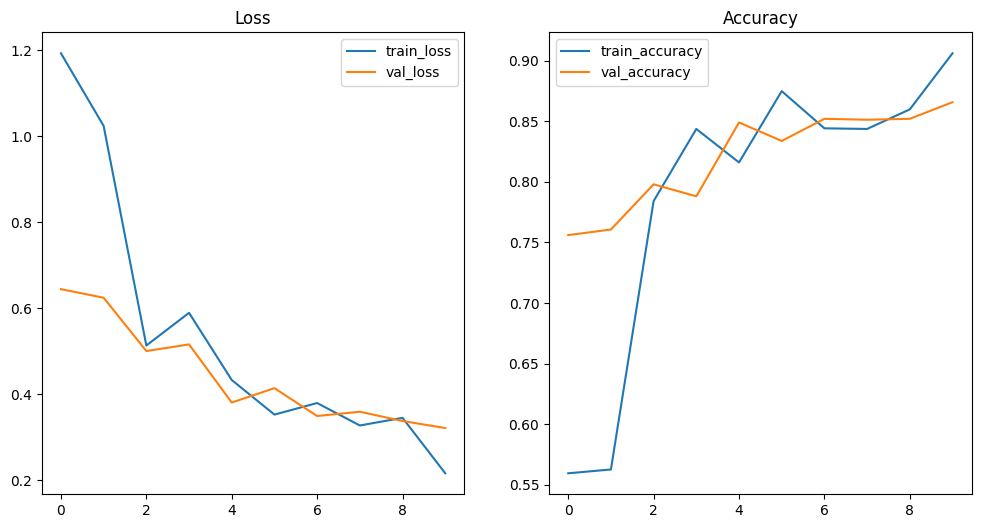

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history2.history["loss"], label="train_loss")
plt.plot(history2.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history2.history["accuracy"], label="train_accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()

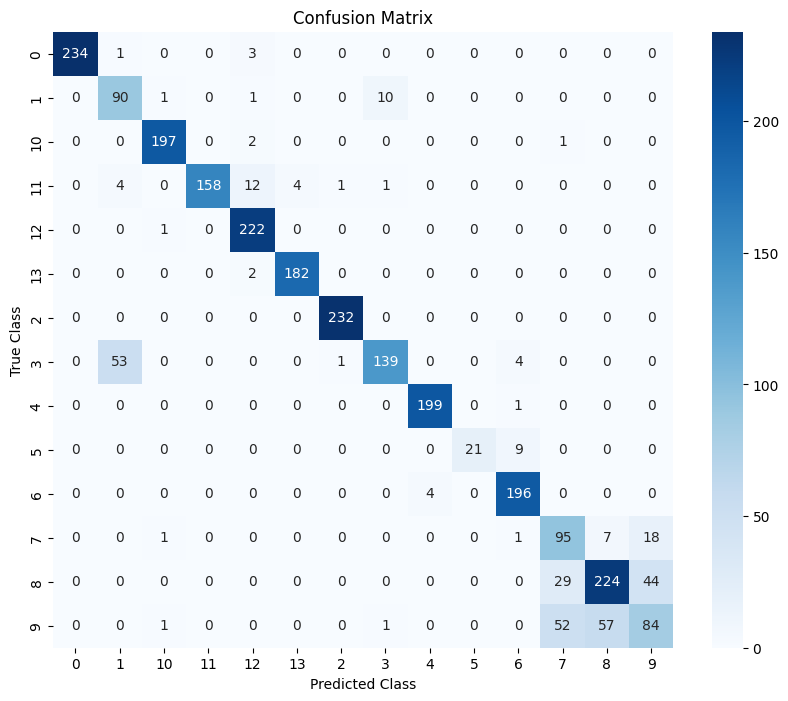

In [37]:
cm2 = confusion_matrix(generator_test2.classes, y_pred2)

plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [38]:
image_path_show_V=[]
image_show_V=[]

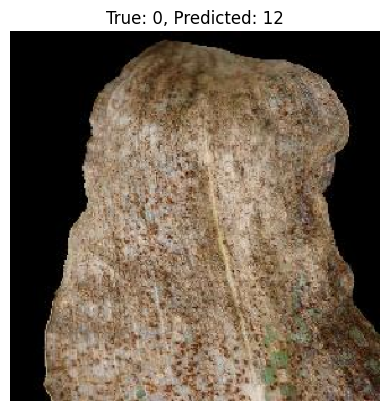

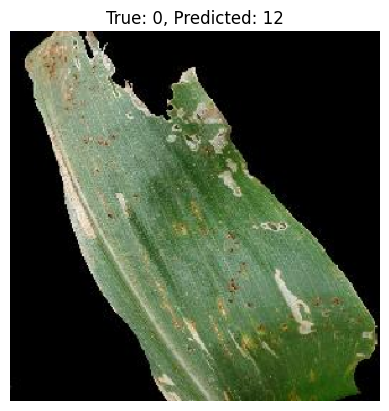

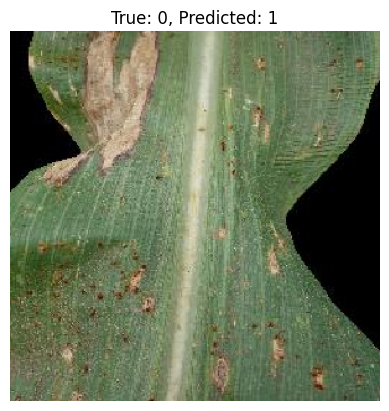

In [39]:
img_width, img_height= 299, 299
misclassified_images_V = []
for i in range(len(y_pred2)):
    if y_pred2[i] != generator_test2.classes[i]:
        img_path = generator_test2.filepaths[i]
        true_label = generator_test2.classes[i]
        predicted_label = y_pred2[i]
        misclassified_images_V.append((img_path, true_label, predicted_label))


num_display = 3
for img_path, true_label, predicted_label in misclassified_images_V[:num_display]:
    img = load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_label]}, Predicted: {class_labels[predicted_label]}")
    plt.axis('off')
    plt.show()
    
    image_path_show_V.append(img_path)
    image_show_V.append(img)

# **XAI**

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [41]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

In [42]:
def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# **Misclassify Images by VGG19**

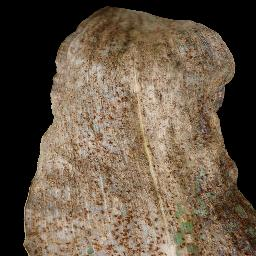

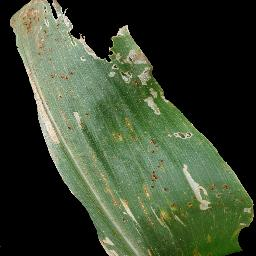

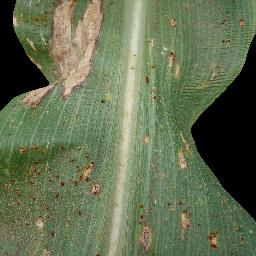

In [43]:
for path in image_path_show_V:
    img_path = path
    display(Image(img_path))

In [44]:
heatmaps=[]

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n03743016', 'megalith', np.float32(8.087697))]


C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_94']
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


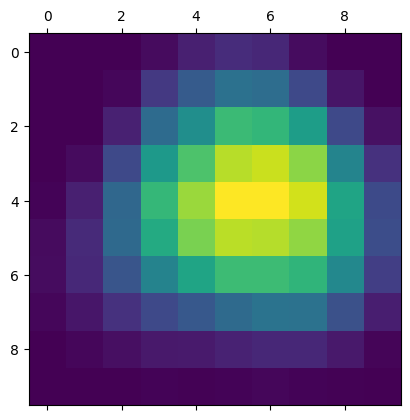

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n07718472', 'cucumber', np.float32(10.652789))]


C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_228']
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


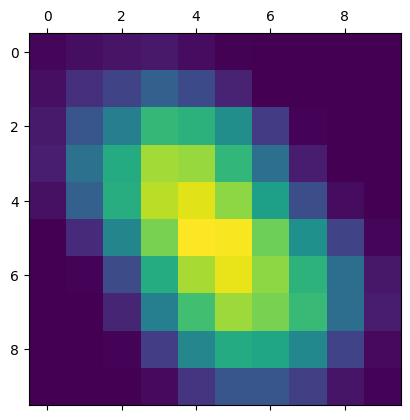

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n13133613', 'ear', np.float32(6.599807))]


C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_362']
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


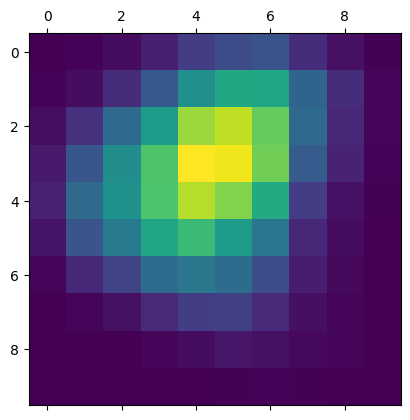

In [45]:
for img_path in image_path_show_V:
    img_array = preprocess_input(get_img_array(img_path, size=img_size))

    model = model_builder(weights="imagenet")
    model.layers[-1].activation = None

    preds = model.predict(img_array)
    print("Predicted:", decode_predictions(preds, top=1)[0])

    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    heatmaps.append(heatmap)

    plt.matshow(heatmap)
    plt.show()

In [46]:
len(heatmaps)

3

C:\Users\sk_ta\AppData\Local\Temp\ipykernel_19952\3325677642.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = cm.get_cmap("jet")


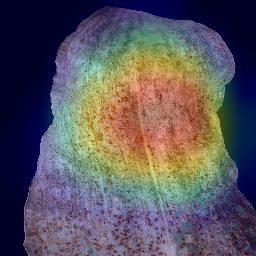

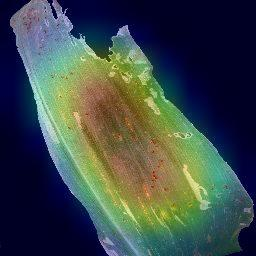

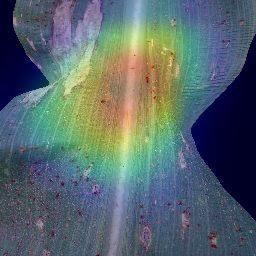

In [47]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)

    display(Image(cam_path))


for i in range(len(image_path_show_V)):
    img_path= image_path_show_V[i]
    heatmap= heatmaps[i]
    save_and_display_gradcam(img_path, heatmap)